In [177]:
import os
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 2000
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
sns.set()
from plotly import tools
import chart_studio.plotly as py
import plotly
import plotly.graph_objs as go
import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import numpy as np
# Pretty display for notebooks
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
import pickle

In [360]:
# Read the data

In [218]:
df = pd.read_csv('Acc.csv', low_memory = False)

# 1. Exploratory Data Analysis

In [219]:
df.head(5)

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2017010001708               532920.0                196330.0  -0.080107   
1  2017010009342               526790.0                181970.0  -0.173845   
2  2017010009344               535200.0                181260.0  -0.052969   
3  2017010009348               534340.0                193560.0  -0.060658   
4  2017010009350               533680.0                187820.0  -0.072372   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.650061             1                  1                   2   
1  51.522425             1                  3                   2   
2  51.514096             1                  3                   3   
3  51.624832             1                  3                   2   
4  51.573408             1                  2                   1   

   Number_of_Casualties        Date  Day_of_Week   Time  \
0                     3  05/08/2017            7  03:12   
1                     1  01/01/2017            1  01:30   
2                     1  01/01/2017            1  00:30   
3                     1  01/01/2017            1  01:11   
4                     1  01/01/2017            1  01:42   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                          32                 E09000010               3   
1                           1                 E09000033               3   
2                           5                 E09000030               3   
3                          32                 E09000010               3   
4                           4                 E09000012               3   

   1st_Road_Number  Road_Type  Speed_limit  Junction_Detail  Junction_Control  \
0              105          6           30                0                -1   
1                5          6           30                3                 4   
2               13          6           30                3                 4   
3             1010          1           30                1                 4   
4              107          3           20                6                 2   

   2nd_Road_Class  2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0              -1                0                                  0   
1               6                0                                  0   
2               5                0                                  0   
3               4              154                                  0   
4               3               10                                  0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                        0                 4   
1                                        0                 4   
2                                        0                 4   
3                                        4                 4   
4                                        5                 4   

   Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                   1                        1                           0   
1                   1                        2                           0   
2                   1                        1                           0   
3                   2                        2                           0   
4                   1                        2                           0   

   Carriageway_Hazards  Urban_or_Rural_Area  \
0                    0                    1   
1                    0                    1   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  
0                                            1                 E01001450  
1                                            1                 E01004702  
2                       

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 32 columns):
Accident_Index                                 129982 non-null object
Location_Easting_OSGR                          129963 non-null float64
Location_Northing_OSGR                         129963 non-null float64
Longitude                                      129953 non-null float64
Latitude                                       129953 non-null float64
Police_Force                                   129982 non-null int64
Accident_Severity                              129982 non-null int64
Number_of_Vehicles                             129982 non-null int64
Number_of_Casualties                           129982 non-null int64
Date                                           129982 non-null object
Day_of_Week                                    129982 non-null int64
Time                                           129979 non-null object
Local_Authority_(District)                     129

In [220]:
df.shape

(129982, 32)

In [221]:
df.describe()

Location_Easting_OSGR  Location_Northing_OSGR      Longitude  \
count          129963.000000            1.299630e+05  129953.000000   
mean           451170.256719            2.835784e+05      -1.268385   
std             95152.629739            1.534918e+05       1.395881   
min             73639.000000            1.210700e+04      -7.409550   
25%            387278.500000            1.760000e+05      -2.190772   
50%            457594.000000            2.241260e+05      -1.149752   
75%            528910.000000            3.888285e+05      -0.141685   
max            655391.000000            1.177531e+06       1.759641   

            Latitude   Police_Force  Accident_Severity  Number_of_Vehicles  \
count  129953.000000  129982.000000      129982.000000       129982.000000   
mean       52.439387      28.527996           2.800849            1.838147   
std         1.382508      25.064407           0.430441            0.722479   
min        49.929558       1.000000           1.000000            1.000000   
25%        51.470399       5.000000           3.000000            1.000000   
50%        51.900636      23.000000           3.000000            2.000000   
75%        53.393024      45.000000           3.000000            2.000000   
max        60.480924      98.000000           3.000000           23.000000   

       Number_of_Casualties    Day_of_Week  Local_Authority_(District)  \
count         129982.000000  129982.000000               129982.000000   
mean               1.315513       4.105245                  328.899286   
std                0.765469       1.930446                  258.587181   
min                1.000000       1.000000                    1.000000   
25%                1.000000       2.000000                   91.000000   
50%                1.000000       4.000000                  303.000000   
75%                1.000000       6.000000                  513.000000   
max               42.000000       7.000000                  941.000000   

       1st_Road_Class  1st_Road_Number      Road_Type    Speed_limit  \
count   129982.000000    129982.000000  129982.000000  129982.000000   
mean         4.224154       852.034089       5.172832      37.258467   
std          1.473923      1692.951438       1.716943      13.976647   
min          1.000000         0.000000       1.000000      20.000000   
25%          3.000000         0.000000       6.000000      30.000000   
50%          4.000000        43.000000       6.000000      30.000000   
75%          6.000000       587.000000       6.000000      40.000000   
max          6.000000      9786.000000       9.000000      70.000000   

       Junction_Detail  Junction_Control  2nd_Road_Class  2nd_Road_Number  \
count    129982.000000     129982.000000   129982.000000    129982.000000   
mean          2.259336          1.598552        2.632541       301.154729   
std           2.582729          2.353005        3.224473      1152.369545   
min          -1.000000         -1.000000       -1.000000        -1.000000   
25%           0.000000         -1.000000       -1.000000         0.000000   
50%           1.000000          2.000000        3.000000         0.000000   
75%           3.000000          4.000000        6.000000         0.000000   
max           9.000000          4.000000        6.000000      9704.000000   

       Pedestrian_Crossing-Human_Control  \
count                      129982.000000   
mean                            0.002739   
std                             0.248010   
min                            -1.000000   
25%                             0.000000   
50%                             0.000000   
75%                             0.000000   
max                             2.000000   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
count                            129982.000000     129982.000000   
mean                                  0.823452          2.036597   
std                                   1.950560       

In [222]:
# Since data has very very small percentage of missing values, lets drop the missing values
df = df.dropna()

In [223]:
df.shape

(122838, 32)

## 1.1 Number of Accidents Analysis by Severity

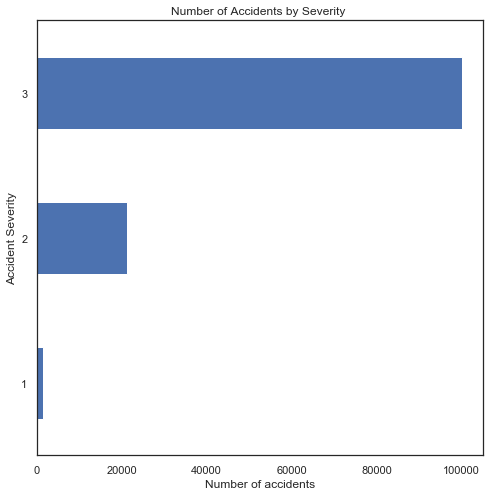

In [362]:
plt.figure(figsize=(8,8))
df.groupby([df['Accident_Severity']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Accidents by Severity ')
plt.ylabel('Accident Severity')
plt.xlabel('Number of accidents')
plt.show()

## 1.2 Accidents vs Junction_Control
    "Based on severity, To understand diffrent types of Junctions and Accidents we have"

In [225]:
df.Junction_Control.unique()

array([-1,  4,  2,  3,  1])

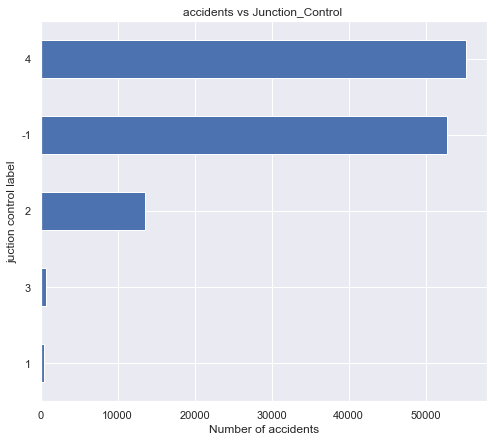

In [226]:
plt.figure(figsize=(8,7))
df.groupby([df['Junction_Control']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('accidents vs Junction_Control ')
plt.ylabel('juction control label')
plt.xlabel('Number of accidents')
plt.show()

## 1.3 Accident Severity vs Urban_or_Rural_Area 

In [227]:
Accidents_on_area_severity = df.groupby(['Urban_or_Rural_Area','Accident_Severity']).count().reset_index()

In [228]:
Accidents_on_area_severity

Urban_or_Rural_Area  Accident_Severity  Accident_Index  \
0                    1                  1             581   
1                    1                  2           13119   
2                    1                  3           69284   
3                    2                  1             954   
4                    2                  2            8036   
5                    2                  3           30864   

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude  Latitude  \
0                    581                     581        581       581   
1                  13119                   13119      13119     13119   
2                  69284                   69284      69284     69284   
3                    954                     954        954       954   
4                   8036                    8036       8036      8036   
5                  30864                   30864      30864     30864   

   Police_Force  Number_of_Vehicles  Number_of_Casualties   Date  Day_of_Week  \
0           581                 581                   581    581          581   
1         13119               13119                 13119  13119        13119   
2         69284               69284                 69284  69284        69284   
3           954                 954                   954    954          954   
4          8036                8036                  8036   8036         8036   
5         30864               30864                 30864  30864        30864   

    Time  Local_Authority_(District)  Local_Authority_(Highway)  \
0    581                         581                        581   
1  13119                       13119                      13119   
2  69284                       69284                      69284   
3    954                         954                        954   
4   8036                        8036                       8036   
5  30864                       30864                      30864   

   1st_Road_Class  1st_Road_Number  Road_Type  Speed_limit  Junction_Detail  \
0             581              581        581          581              581   
1           13119            13119      13119        13119            13119   
2           69284            69284      69284        69284            69284   
3             954              954        954          954              954   
4            8036             8036       8036         8036             8036   
5           30864            30864      30864        30864            30864   

   Junction_Control  2nd_Road_Class  2nd_Road_Number  \
0               581             581              581   
1             13119           13119            13119   
2             69284           69284            69284   
3               954             954              954   
4              8036            8036             8036   
5             30864           30864            30864   

   Pedestrian_Crossing-Human_Control  Pedestrian_Crossing-Physical_Facilities  \
0                                581                                      581   
1                              13119                                    13119   
2                              69284                                    69284   
3                                954                                      954   
4                               8036                                     8036   
5                              30864                                    30864   

   Light_Conditions  Weather_Conditions  Road_Surface_Conditions  \
0               581                 581                      581   
1             13119               13119                    13119   
2             69284               69284                    69284   
3               954                 954                      954   
4              8036                8036                     8036   
5             30864               30864                    30864   

   Special_Conditions_at_Site  Ca

/Users/s.parampottupadam/Installations/anaconda3/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



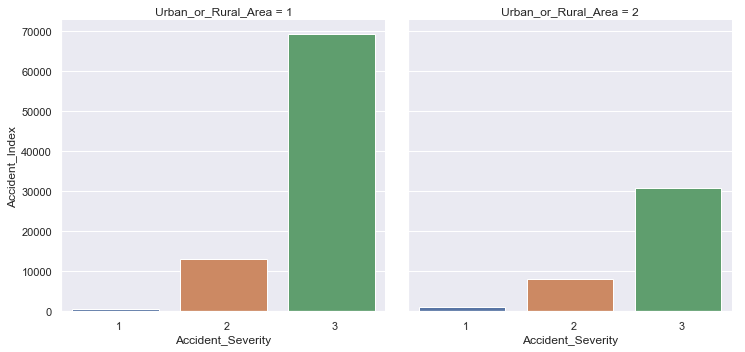

In [229]:
g =sns.factorplot("Accident_Severity", y='Accident_Index', col="Urban_or_Rural_Area", col_wrap=4,
                   data=Accidents_on_area_severity, kind='bar')
for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=1, ha='left')

plt.subplots_adjust(hspace=0.4)

## 1.4 Sliding Time Based Analysis

In [269]:
time_analysis = df[['Accident_Index', 'Time']]
time_analysis['Hour'] = time_analysis['Time'].str[0:2]
time_analysis['Hour'] = pd.to_numeric(time_analysis['Hour'])
time_analysis = time_analysis.dropna(subset=['Hour'])
time_analysis['Hour'] = time_analysis['Hour'].astype('int')


/Users/s.parampottupadam/Installations/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/s.parampottupadam/Installations/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [270]:
time_analysis

Accident_Index   Time  Hour
0       2017010001708  03:12     3
1       2017010009342  01:30     1
2       2017010009344  00:30     0
3       2017010009348  01:11     1
4       2017010009350  01:42     1
...               ...    ...   ...
122864  201763DP07517  11:45    11
122865  201763DP07617  08:45     8
122866  201763DP07717  06:36     6
122867  201763DP07817  08:50     8
122868  201763DP07917  13:34    13

[122838 rows x 3 columns]

In [271]:
time_analysis_ =  time_analysis.groupby(['Hour']).count().reset_index()

In [273]:
fig = px.line(time_analysis_, x='Hour', y='Accident_Index', title='Sliding hour Analysis')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="hour", step="hour", stepmode="backward"),
            dict(count=6, label="hour", step="hour", stepmode="backward"),
            dict(count=1, label="hour", step="hour", stepmode="todate"),
            dict(count=1, label="hour", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [274]:
time_analysis_.head(10)

Hour  Accident_Index  Time
0     0            1831  1831
1     1            1290  1290
2     2             962   962
3     3             840   840
4     4             707   707
5     5            1212  1212
6     6            2521  2521
7     7            5596  5596
8     8            8772  8772
9     9            5835  5835

## 1.5 Day Time Analysis

In [275]:
def custom_day_time(hour):
    if hour >= 6 and hour < 10:
        return "6 am to 10 am"
    elif hour >= 10 and hour < 13:
        return "10am tp 1pm"
    elif hour >= 13 and hour < 17:
        return "1pm to 5pm"
    elif hour >= 17 and hour < 20:
        return "5pm to 8pm"
    elif hour >= 20 and hour < 22:
        return "8pm to 10pm"
      
    else:
        return "after 10 pm"
time_analysis_['day_periods'] = time_analysis_['Hour'].apply(custom_day_time)


In [277]:
time_analysis_.head(5)

Hour  Accident_Index  Time  day_periods
0     0            1831  1831  after 10 pm
1     1            1290  1290  after 10 pm
2     2             962   962  after 10 pm
3     3             840   840  after 10 pm
4     4             707   707  after 10 pm

In [278]:
time_analysis = time_analysis_.groupby(['day_periods']).count().reset_index()
time_analysis = time_analysis_ [['day_periods','Accident_Index']]

In [279]:
time_analysis

day_periods  Accident_Index
0     after 10 pm            1831
1     after 10 pm            1290
2     after 10 pm             962
3     after 10 pm             840
4     after 10 pm             707
5     after 10 pm            1212
6   6 am to 10 am            2521
7   6 am to 10 am            5596
8   6 am to 10 am            8772
9   6 am to 10 am            5835
10    10am tp 1pm            5573
11    10am tp 1pm            6076
12    10am tp 1pm            6946
13     1pm to 5pm            7136
14     1pm to 5pm            7313
15     1pm to 5pm            9495
16     1pm to 5pm            9820
17     5pm to 8pm           11005
18     5pm to 8pm            8877
19     5pm to 8pm            6540
20    8pm to 10pm            4819
21    8pm to 10pm            3768
22    after 10 pm            3340
23    after 10 pm            2564

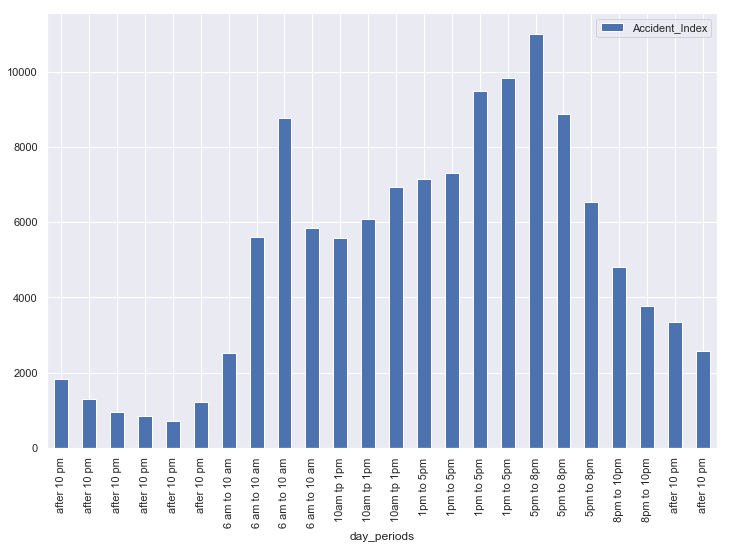

In [282]:
ax = time_analysis.plot.bar(x='day_periods', y='Accident_Index', rot=90, figsize=(12,8))

## 1.6 Months vs  Accident 

In [283]:

df['Month'] = df['Date'].apply(lambda x : str(x).split("/")[1])

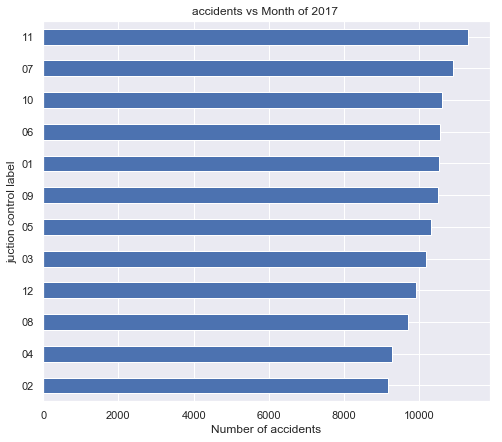

In [284]:
plt.figure(figsize=(8,7))
df.groupby([df['Month']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('accidents vs Month of 2017 ')
plt.ylabel('juction control label')
plt.xlabel('Number of accidents')
plt.show()

In [285]:
each_month_accidents = df.groupby(['Month']).count().reset_index()

In [286]:
fig = px.scatter(each_month_accidents, x="Month", y="Accident_Index",
         size="Accident_Index", color="Accident_Index",
                 hover_name="Accident_Index", log_x=True, size_max=60)
fig.show()

## 1.7 Day vs  Accidents

In [287]:
each_day_accidents = df.groupby(['Day_of_Week']).count().reset_index()

In [288]:
fig = px.scatter(each_day_accidents, x="Day_of_Week", y="Accident_Index",
         size="Accident_Index", color="Accident_Index",
                 hover_name="Accident_Index", log_x=True, size_max=60)
fig.show()

## 1.8 Accident Trends Over Months

In [293]:

Accident_Severity_vs_Months = df[['Date', 'Accident_Index', 'Accident_Severity','Month']]
Accident_Severity_vs_Months['Date']= pd.to_datetime(Accident_Severity_vs_Months['Date'], format="%d/%m/%Y")
year = Accident_Severity_vs_Months['Date'].dt.year
week = Accident_Severity_vs_Months['Date'].dt.week
Sev_count = Accident_Severity_vs_Months.set_index('Date').groupby([pd.Grouper(freq='W'), 'Accident_Severity']).size()

formatted_accidents_table = Sev_count.rename_axis(['Week', 'Accident_Severity'])\
                                      .unstack('Accident_Severity')\
                                      .rename({1:'Major', 2:'serious', 3:'Minor'}, axis='columns')

/Users/s.parampottupadam/Installations/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [294]:
formatted_accidents_table['sum'] = formatted_accidents_table.sum(axis=1)
formatted_accidents_table = formatted_accidents_table.join(formatted_accidents_table.div(formatted_accidents_table['sum'], axis=0), rsuffix='_percentage')


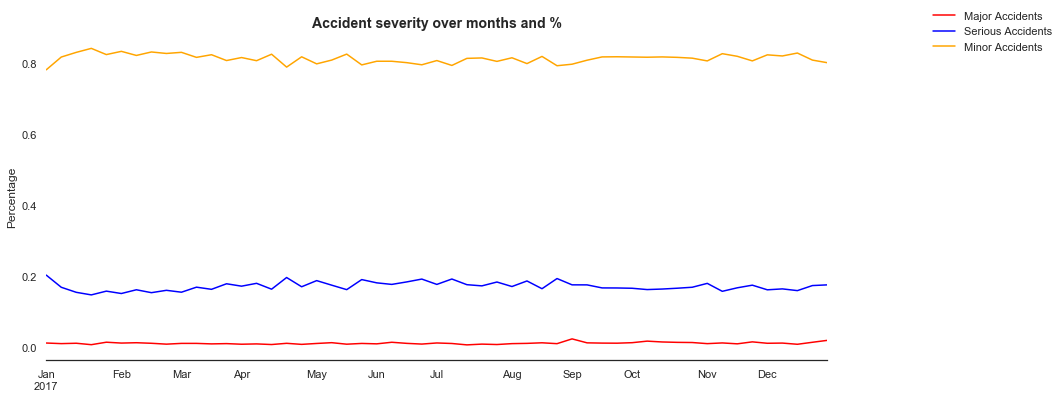

In [361]:

sub_df = formatted_accidents_table[['Major_percentage', 'serious_percentage', 'Minor_percentage']]
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))
colors=['red', 'blue', 'orange']

sub_df.plot(color=colors, ax=ax)
ax.set_title('Accident severity over months and %', fontsize=14, fontweight='bold')
ax.set(ylabel='Percentage', xlabel='')
ax.legend(labels=['Major Accidents', 'Serious Accidents', 'Minor Accidents'], 
          bbox_to_anchor=(1.3, 1.1), frameon=False)
sns.despine(top=True, right=True, left=True, bottom=False);

## 1.9 Speed Limit vs Accidents 

In [296]:
accidents_by_speed = df.Speed_limit.groupby([df.Speed_limit]).count().sort_values()
fig = px.bar(accidents_by_speed, x=accidents_by_speed.index, y=accidents_by_speed)
fig.update_layout(title_text='Speed_limit vs number vs accidents')
fig.show()

## 1.10 Road Surface Conditions vs Accidents

In [297]:
accidents_by_surface = df.Road_Surface_Conditions.groupby([df.Road_Surface_Conditions]).count().sort_values()
fig = px.bar(accidents_by_surface, x=accidents_by_surface.index, y=accidents_by_surface)
fig.update_layout(title_text='Road_Surface_Conditions vs accidents')
fig.show()

## 1.11 Weather condition vs Accidents

In [298]:
Weather_Conditions = df.Weather_Conditions.groupby([df.Weather_Conditions]).count().sort_values()
fig = px.bar(Weather_Conditions, x=Weather_Conditions.index, y=Weather_Conditions)
fig.update_layout(title_text='Weather_Conditions vs accidents counts')
fig.show()

## 1.12 Special consition at site vs Accidents

In [299]:
Special_Conditions_at_Site = df.Special_Conditions_at_Site.groupby([df.Special_Conditions_at_Site]).count().sort_values()
fig = px.bar(Special_Conditions_at_Site, x=Special_Conditions_at_Site.index, y=Special_Conditions_at_Site)
fig.update_layout(title_text='Special_Conditions_at_Site vs accidents counts')
fig.show()

## 1.13 Accidents vs Light Condition

In [302]:
Light_Conditions = df.Light_Conditions.groupby([df.Light_Conditions]).count().sort_values()
fig = px.bar(Light_Conditions, x=Light_Conditions.index, y=Light_Conditions)
fig.update_layout(title_text='Light_Conditions vs accidents counts')
fig.show()

## 1.14 Map Analysis using Lat, Longitute 

In [305]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [304]:

fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,height=800,
                        mapbox_style="stamen-terrain")
fig.show()

## 1.15 Month vs Weekdays vs Accidents Heat Map

In [306]:
df['Month'] = df['Date'].apply(lambda x : str(x).split("/")[1])
df['Day'] = df['Date'].apply(lambda x : str(x).split("/")[0])

In [307]:
df.head(2)

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2017010001708               532920.0                196330.0  -0.080107   
1  2017010009342               526790.0                181970.0  -0.173845   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.650061             1                  1                   2   
1  51.522425             1                  3                   2   

   Number_of_Casualties        Date  Day_of_Week   Time  \
0                     3  05/08/2017            7  03:12   
1                     1  01/01/2017            1  01:30   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                          32                 E09000010               3   
1                           1                 E09000033               3   

   1st_Road_Number  Road_Type  Speed_limit  Junction_Detail  Junction_Control  \
0              105          6           30                0                -1   
1                5          6           30                3                 4   

   2nd_Road_Class  2nd_Road_Number  Pedestrian_Crossing-Human_Control  \
0              -1                0                                  0   
1               6                0                                  0   

   Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                        0                 4   
1                                        0                 4   

   Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                   1                        1                           0   
1                   1                        2                           0   

   Carriageway_Hazards  Urban_or_Rural_Area  \
0                    0                    1   
1                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident LSOA_of_Accident_Location  \
0                                            1                 E01001450   
1                                            1                 E01004702   

  Month Day  
0    08  05  
1    01  01

In [308]:
def calculate_month_week_data(df, month):
    month_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["Month"] == month and row["Day"] == "01": mon +=1
        elif row["Month"] == month and row["Day"] == "02": tues +=1
        elif row["Month"] == month and row["Day"] == "03": wed +=1
        elif row["Month"] == month and row["Day"] == "04": thurs +=1
        elif row["Month"] == month and row["Day"] == "05": fri +=1
        elif row["Month"] == month and row["Day"] == "06": sat +=1
        elif row["Month"] == month and row["Day"] == "07": sun +=1
        else: a=0 

    month_list.append(mon)
    month_list.append(tues)
    month_list.append(wed)
    month_list.append(thurs)
    month_list.append(fri)
    month_list.append(sat)
    month_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(month_list)

In [309]:
Month1 = calculate_month_week_data(df, '01')
Month2 = calculate_month_week_data(df, '02')
Month3 = calculate_month_week_data(df, '03')
Month4 = calculate_month_week_data(df, '04')
Month5 = calculate_month_week_data(df, '05')
Month6 = calculate_month_week_data(df, '06')
Month7 = calculate_month_week_data(df, '07')
Month8 = calculate_month_week_data(df, '08')
Month9 = calculate_month_week_data(df, '09')
Month10 = calculate_month_week_data(df, '10')
Month11 = calculate_month_week_data(df, '11')
Month21 = calculate_month_week_data(df, '12')

In [310]:
columns = ["1", "2", "3", "4", "5", "6", "7"]
rows = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
monthwisefile = np.array([Month1, Month2, Month3, Month4, Month5, Month6, Month7, Month8, Month9, Month10, Month11, Month21])
month_heat_map = pd.DataFrame(data=monthwisefile, index=rows, columns=columns)

In [311]:

month_heat_map

1    2    3    4    5    6    7
1   230  274  290  321  415  353  240
2   312  374  427  345  236  376  411
3   344  372  374  285  265  326  339
4   310  337  327  286  357  367  352
5   251  344  357  308  377  281  285
6   354  361  325  259  358  352  321
7   339  374  337  401  432  375  451
8   330  347  278  334  321  284  271
9   369  334  271  308  335  333  326
10  241  309  409  317  389  397  322
11  347  334  412  333  268  422  398
12  529  296  258  371  365  393  403

Text(0.5, 1.0, 'Traffic Accidents by week for each month from 2009-2014')

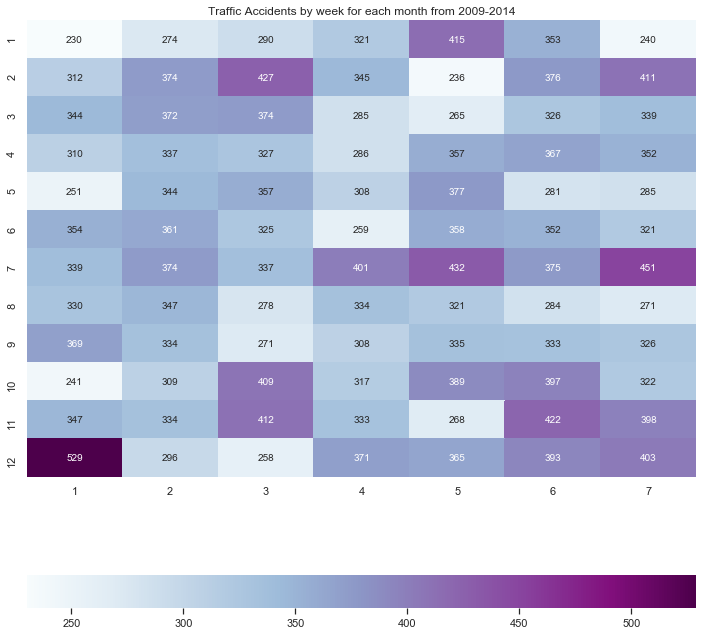

In [312]:

fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(month_heat_map, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
map1.set_title("Traffic Accidents by week for each month from 2009-2014")

# 2. Modelling - MVP

In [ ]:
# Libararies to Support Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score
from matplotlib import pyplot

**Goal: model that predicts if a police officer is likely to attend an accident or not**

In [317]:
newdf =  pd.read_csv('Acc.csv', low_memory = False)
newdf = newdf.dropna()
newdf['Month'] = newdf['Date'].apply(lambda x : str(x).split("/")[1])
newdf['Day'] = newdf['Date'].apply(lambda x : str(x).split("/")[0])

In [318]:
newdf["Did_Police_Officer_Attend_Scene_of_Accident"].replace({1: 1, 2: 0}, inplace=True)

In [319]:
newdf.shape

(122838, 34)

In [320]:
newdf.head(10)

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2017010001708               532920.0                196330.0  -0.080107   
1  2017010009342               526790.0                181970.0  -0.173845   
2  2017010009344               535200.0                181260.0  -0.052969   
3  2017010009348               534340.0                193560.0  -0.060658   
4  2017010009350               533680.0                187820.0  -0.072372   
5  2017010009351               514510.0                172370.0  -0.353876   
6  2017010009353               508640.0                181870.0  -0.435377   
7  2017010009354               527880.0                181950.0  -0.158150   
8  2017010009357               520940.0                192820.0  -0.254393   
9  2017010009358               531430.0                178450.0  -0.108314   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.650061             1                  1                   2   
1  51.522425             1                  3                   2   
2  51.514096             1                  3                   3   
3  51.624832             1                  3                   2   
4  51.573408             1                  2                   1   
5  51.438762             1                  3                   2   
6  51.525305             1                  3                   2   
7  51.522000             1                  3                   2   
8  51.621219             1                  2                   1   
9  51.489732             1                  2                   1   

   Number_of_Casualties        Date  Day_of_Week   Time  \
0                     3  05/08/2017            7  03:12   
1                     1  01/01/2017            1  01:30   
2                     1  01/01/2017            1  00:30   
3                     1  01/01/2017            1  01:11   
4                     1  01/01/2017            1  01:42   
5                     1  01/01/2017            1  03:31   
6                     2  01/01/2017            1  04:07   
7                     1  01/01/2017            1  05:20   
8                     1  01/01/2017            1  03:18   
9                     1  01/01/2017            1  03:00   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  \
0                          32                 E09000010               3   
1                           1                 E09000033               3   
2                           5                 E09000030               3   
3                          32                 E09000010               3   
4                           4                 E09000012               3   
5                          24                 E09000027               6   
6                          26                 E09000017               3   
7                           1                 E09000033               3   
8                          30                 E09000003               3   
9                           9                 E09000022               3   

   1st_Road_Number  Road_Type  Speed_limit  Junction_Detail  Junction_Control  \
0              105          6           30                0                -1   
1                5          6           30                3                 4   
2               13          6           30                3                 4   
3             1010          1           30                1                 4   
4              107          3           20                6                 2   
5                0          6           30                0                -1   
6             4020          3           40                3                 4   
7              501          3           30                0                -1   
8                1          3           50                1                 2   
9             3204          6           30                3                 4   

   2nd_Road_Cla

**make sure that there is no missing values, **
**the business goal is to predict feature 'Did_Police_Officer_Attend_Scene_of_Accident'**


In [322]:
newdf['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

1    89475
0    33354
3        9
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [323]:
newdf['Did_Police_Officer_Attend_Scene_of_Accident'].unique()

array([1, 0, 3])

 **The outpout variable 'Did_Police_Officer_Attend_Scene_of_Accident' here after called as Y and rest of the columns here after called as training features or x. The Y has 3 category of values, in that value 3 occurs only 9 times, lets omit it as part of outlier detection**

In [324]:
newdf = newdf[(newdf['Did_Police_Officer_Attend_Scene_of_Accident'] != 3)]  
newdf = newdf.drop(['Accident_Index', 'Date','Time','Local_Authority_(Highway)','LSOA_of_Accident_Location'], axis = 1)



In [325]:
newdf['Month'] = newdf['Month'].astype(int)
newdf['Day'] = newdf['Day'].astype(int)

In [328]:
X = newdf.drop('Did_Police_Officer_Attend_Scene_of_Accident', axis=1)
y = newdf['Did_Police_Officer_Attend_Scene_of_Accident']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

## 2.1  Comparision

In [330]:

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier()
    ]

In [331]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("-"*30)
    print(name)
    
    print('----------Results----------')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("-"*30)

------------------------------
KNeighborsClassifier
----------Results----------
Accuracy: 69.3316%
Log Loss: 3.922485166726124
------------------------------
DecisionTreeClassifier
----------Results----------
Accuracy: 71.6030%
Log Loss: 9.80796646303415
------------------------------
RandomForestClassifier
----------Results----------
Accuracy: 78.7267%
Log Loss: 0.4511606458172134
------------------------------


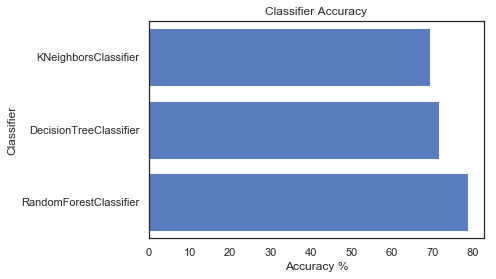

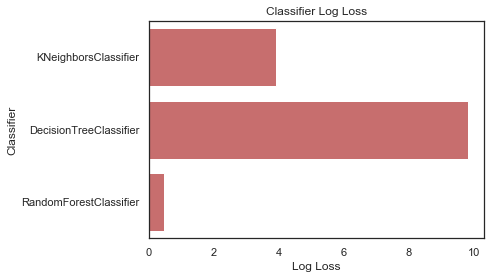

In [332]:


sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## 2.2 Random Forest Model

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

In [334]:
RF_sampling = RandomForestClassifier(random_state=999, criterion='entropy', n_jobs=-1,n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None)
RF_sampling.fit(X_train, y_train)
y_test_preds = RF_sampling.predict(X_test)
matrix = classification_report(y_test, y_test_preds)
print('random forest without sampling \n', matrix)

random forest without sampling 
               precision    recall  f1-score   support

           0       0.68      0.43      0.52      6706
           1       0.81      0.92      0.86     17860

    accuracy                           0.79     24566
   macro avg       0.74      0.68      0.69     24566
weighted avg       0.77      0.79      0.77     24566



## 2.3 Random Forest with SMOTE Sampling

**After getting a initial idea about data and models, lets address the class imbalancing issue**

In [338]:
smote = SMOTE(random_state=999,sampling_strategy='not majority')
x_train_sampled, y_train_sample = smote.fit_sample(X_train, y_train)

In [339]:
print('Resampled dataset shape %s' % Counter(y_train_sampleD))

Resampled dataset shape Counter({1: 71615, 2: 71615})


In [337]:
'''rf = RandomForestClassifier(n_estimators=1)
trees, train_loss, test_loss = [], [], []
for iter in range(100):
  rf.fit(x_train_sampled, y_train_sample)
  y_train_predicted = rf.predict(x_train_sampled)
  y_test_predicted = rf.predict(X_test)
  logloss_train = log_loss(y_train_sample, y_train_predicted)
  logloss_test = log_loss(y_test, y_test_predicted)
  if iter % 20 == 0:
      print("Iteration: {} Train logloss: {} Test logloss: {}".format(iter, logloss_train, logloss_test))
  trees += [rf.n_estimators]
  train_loss += [logloss_train]
  test_loss += [logloss_test]
  rf.n_estimators += 1
plt.figure(figsize=(8,6))  
plt.plot(trees, train_loss, color="blue", label="logloss on Train data")
plt.plot(trees, test_loss, color="red", label="logloss on Test data")
plt.xlabel("# of trees")
plt.ylabel("log loss");
plt.legend()'''


'rf = RandomForestClassifier(n_estimators=1)\ntrees, train_loss, test_loss = [], [], []\nfor iter in range(100):\n  rf.fit(x_train_sampled, y_train_sample)\n  y_train_predicted = rf.predict(x_train_sampled)\n  y_test_predicted = rf.predict(X_test)\n  logloss_train = log_loss(y_train_sample, y_train_predicted)\n  logloss_test = log_loss(y_test, y_test_predicted)\n  if iter % 20 == 0:\n      print("Iteration: {} Train logloss: {} Test logloss: {}".format(iter, logloss_train, logloss_test))\n  trees += [rf.n_estimators]\n  train_loss += [logloss_train]\n  test_loss += [logloss_test]\n  rf.n_estimators += 1\nplt.figure(figsize=(8,6))  \nplt.plot(trees, train_loss, color="blue", label="logloss on Train data")\nplt.plot(trees, test_loss, color="red", label="logloss on Test data")\nplt.xlabel("# of trees")\nplt.ylabel("log loss");\nplt.legend()'

In [340]:
X_train, X_test, y_train, y_test = train_test_split(x_train_sampled, y_train_sample, random_state=999)


In [342]:
RF_sampling = RandomForestClassifier(random_state=999, criterion='entropy', n_jobs=-1,n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None)
RF_sampling.fit(X_train, y_train)
y_test_preds = RF_sampling.predict(X_test)
matrix = classification_report(y_test, y_test_preds)
print('random forest with SMOTE sampling \n', matrix)

random forest with SMOTE sampling 
               precision    recall  f1-score   support

           0       0.86      0.83      0.85     17782
           1       0.84      0.87      0.85     18026

    accuracy                           0.85     35808
   macro avg       0.85      0.85      0.85     35808
weighted avg       0.85      0.85      0.85     35808



In [343]:
precision, recall, fscore, support = score(y_test, y_test_preds)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.86133816 0.83784797]
recall: [0.82965921 0.86824587]
fscore: [0.84520195 0.85277611]
support: [17782 18026]


In [344]:
accuracy_score(y_test, y_test_preds)

0.8490840035746202

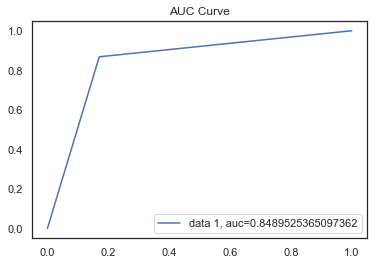

In [345]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_preds)
auc = metrics.roc_auc_score(y_test, y_test_preds)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('AUC Curve')
plt.show()

## 2.4 Variable Importance

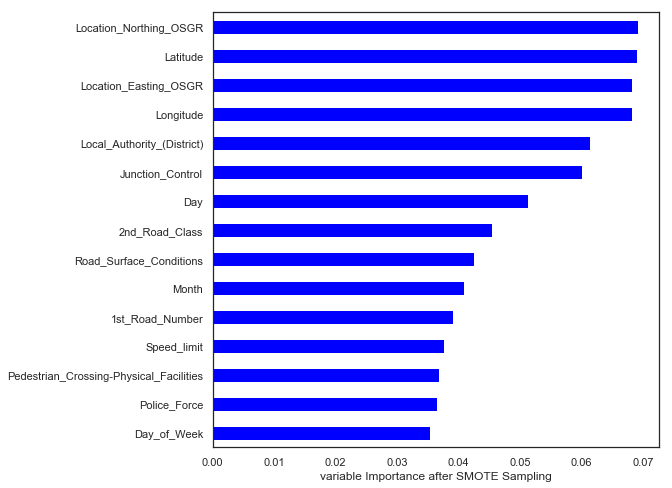

In [346]:
variable_importance = pd.Series(RF_sampling.feature_importances_, index=x_train_sampled.columns)
variable_importance.nlargest(15).sort_values().plot(kind='barh', color='blue', figsize=(8,8))
plt.xlabel('variable Importance after SMOTE Sampling');

## 2.5 XGBoost Model

In [350]:
classifier = xgboost.XGBClassifier(objective='binary:logistic',n_estimators=200)
eval_set = [(x_train_sampled, y_train_sample), (X_test, y_test)]
classifier.fit(x_train_sampled, y_train_sample,early_stopping_rounds=4,eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)



[0]	validation_0-error:0.350974	validation_0-logloss:0.679351	validation_1-error:0.348442	validation_1-logloss:0.678749
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 4 rounds.
[1]	validation_0-error:0.3189	validation_0-logloss:0.664369	validation_1-error:0.316047	validation_1-logloss:0.66331
[2]	validation_0-error:0.315918	validation_0-logloss:0.653406	validation_1-error:0.31384	validation_1-logloss:0.652614
[3]	validation_0-error:0.317399	validation_0-logloss:0.644253	validation_1-error:0.314511	validation_1-logloss:0.643201
[4]	validation_0-error:0.290344	validation_0-logloss:0.632669	validation_1-error:0.28879	validation_1-logloss:0.631671
[5]	validation_0-error:0.293123	validation_0-logloss:0.625917	validation_1-error:0.292002	validation_1-logloss:0.624736
[6]	validation_0-error:0.284612	validation_0-logloss:0.619038	validation_1-error:0.283121	validation_1-logloss:0.617723
[

[67]	validation_0-error:0.19602	validation_0-logloss:0.43888	validation_1-error:0.195096	validation_1-logloss:0.436651
[68]	validation_0-error:0.195629	validation_0-logloss:0.438278	validation_1-error:0.194873	validation_1-logloss:0.436038
[69]	validation_0-error:0.19549	validation_0-logloss:0.437453	validation_1-error:0.194789	validation_1-logloss:0.435235
[70]	validation_0-error:0.194973	validation_0-logloss:0.435921	validation_1-error:0.194174	validation_1-logloss:0.433684
[71]	validation_0-error:0.194785	validation_0-logloss:0.435413	validation_1-error:0.194119	validation_1-logloss:0.433194
[72]	validation_0-error:0.194268	validation_0-logloss:0.434346	validation_1-error:0.193141	validation_1-logloss:0.432098
[73]	validation_0-error:0.194142	validation_0-logloss:0.433633	validation_1-error:0.192946	validation_1-logloss:0.431393
[74]	validation_0-error:0.193912	validation_0-logloss:0.433037	validation_1-error:0.193057	validation_1-logloss:0.43078
[75]	validation_0-error:0.19357	vali

[135]	validation_0-error:0.182162	validation_0-logloss:0.399148	validation_1-error:0.18359	validation_1-logloss:0.397093
[136]	validation_0-error:0.181875	validation_0-logloss:0.398466	validation_1-error:0.183088	validation_1-logloss:0.39639
[137]	validation_0-error:0.181589	validation_0-logloss:0.397902	validation_1-error:0.182976	validation_1-logloss:0.395808
[138]	validation_0-error:0.181582	validation_0-logloss:0.397734	validation_1-error:0.183004	validation_1-logloss:0.395652
[139]	validation_0-error:0.181519	validation_0-logloss:0.397599	validation_1-error:0.182613	validation_1-logloss:0.395505
[140]	validation_0-error:0.181324	validation_0-logloss:0.397133	validation_1-error:0.182473	validation_1-logloss:0.395049
[141]	validation_0-error:0.181079	validation_0-logloss:0.396989	validation_1-error:0.182278	validation_1-logloss:0.394909
[142]	validation_0-error:0.181184	validation_0-logloss:0.396869	validation_1-error:0.182445	validation_1-logloss:0.394785
[143]	validation_0-error:0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [351]:
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.38%


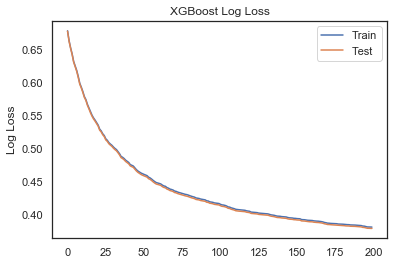

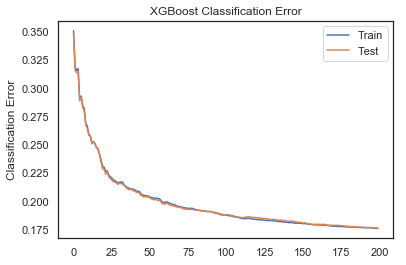

In [352]:
results = classifier.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

## 2.6 Stratified K Fold cross validation

kfold = StratifiedKFold(n_splits=10, random_state=7)
results = cross_val_score(classifier, x_train_sampled, y_train_sample, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [354]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)


In [355]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [356]:
Y_predict = pickle_model.predict(X_test.head(10))

In [357]:
Y_predict

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

## End